In [3]:


import Classifiers as cl
import process as pp
from sklearn.model_selection import train_test_split




fs = 60
window_duration_sec = 0.3
overlap = 0.1

X, y = pp.load_and_preprocess_data('./Train_data', window_duration_sec, fs, overlap)
y_encoded, label_to_idx = pp.encode_labels(y)
sensor_columns = ['acceleration_x', 'acceleration_y', 'acceleration_z',
                      'gyroscope_x', 'gyroscope_y', 'gyroscope_z']



print("Label to index mapping:", label_to_idx)
print("X shape:", X.shape)  
print("y shape:", y_encoded.shape)
print("y:", y_encoded)
print(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=124)





Loading ./Train_data/Jacob_running.csv
The average frequency is approximately 59.08 Hz
Loaded 5820 samples
Applied low-pass filter
Segmented into 645 windows
Loading ./Train_data/Jacob_first_gym.csv
The average frequency is approximately 59.65 Hz
Loaded 7105 samples
Applied low-pass filter
Segmented into 788 windows
Loading ./Train_data/Julia_first_gym.csv
The average frequency is approximately 61.00 Hz
Loaded 5993 samples
Applied low-pass filter
Segmented into 664 windows
Loading ./Train_data/Julia_running.csv
The average frequency is approximately 54.71 Hz
Loaded 4971 samples
Applied low-pass filter
Segmented into 551 windows
Loading ./Train_data/julia_sitting_to_fall.csv
The average frequency is approximately 60.64 Hz
Loaded 4987 samples
Applied low-pass filter
Segmented into 553 windows
Loading ./Train_data/Marten_second.csv
The average frequency is approximately 60.08 Hz
Loaded 4800 samples
Applied low-pass filter
Segmented into 532 windows
Loading ./Train_data/Marten_first.csv
Th

Epoch [1/30] | Train Loss: 1.8388, Train Acc: 0.4103 | Val Loss: 1.6698, Val Acc: 0.5103
Epoch [2/30] | Train Loss: 1.4567, Train Acc: 0.4740 | Val Loss: 1.2152, Val Acc: 0.5515
Epoch [3/30] | Train Loss: 1.1487, Train Acc: 0.5735 | Val Loss: 1.0055, Val Acc: 0.6464
Epoch [4/30] | Train Loss: 1.0118, Train Acc: 0.6273 | Val Loss: 0.9189, Val Acc: 0.6639
Epoch [5/30] | Train Loss: 0.9383, Train Acc: 0.6603 | Val Loss: 0.8661, Val Acc: 0.6845
Epoch [6/30] | Train Loss: 0.8894, Train Acc: 0.6820 | Val Loss: 0.8339, Val Acc: 0.6948
Epoch [7/30] | Train Loss: 0.8553, Train Acc: 0.7008 | Val Loss: 0.8059, Val Acc: 0.7062
Epoch [8/30] | Train Loss: 0.8214, Train Acc: 0.7090 | Val Loss: 0.7914, Val Acc: 0.7093
Epoch [9/30] | Train Loss: 0.7932, Train Acc: 0.7255 | Val Loss: 0.7683, Val Acc: 0.7134
Epoch [10/30] | Train Loss: 0.7648, Train Acc: 0.7356 | Val Loss: 0.7538, Val Acc: 0.7268
Epoch [11/30] | Train Loss: 0.7396, Train Acc: 0.7474 | Val Loss: 0.7419, Val Acc: 0.7392
Epoch [12/30] | Tra

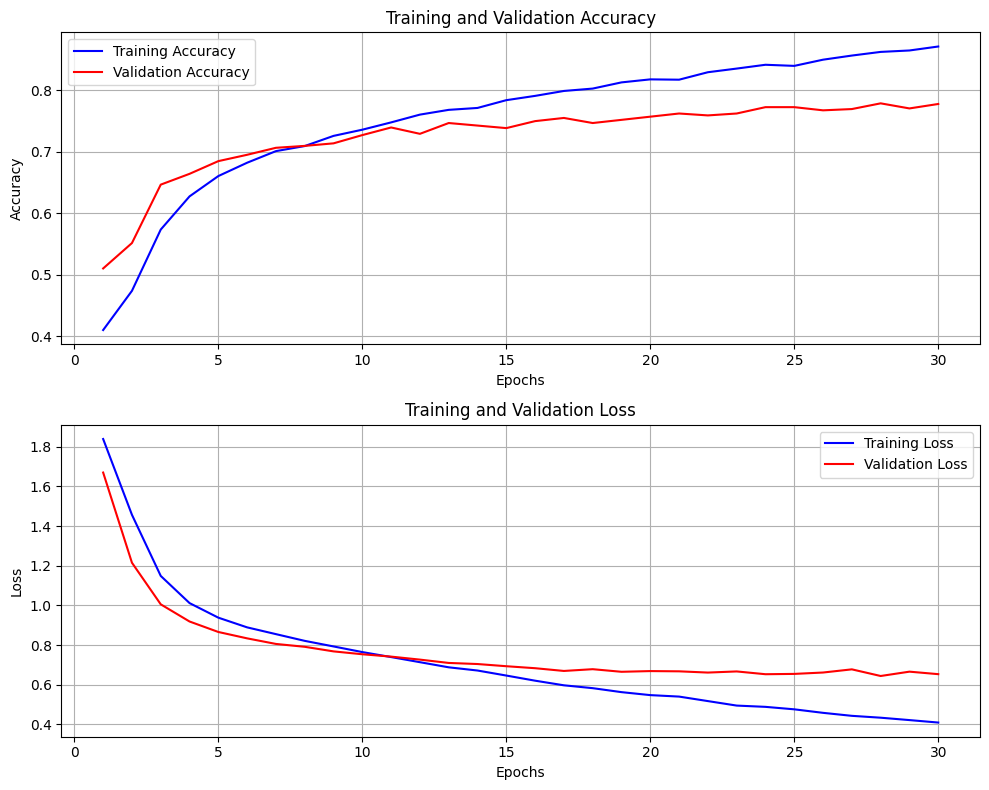

In [ ]:
learn_rate = 0.01


input_size = X_train.shape[2]
seq_len = X_train.shape[1]
num_classes = len(label_to_idx)

model = cl.LSTMClassifier(input_size=input_size, hidden_size=128, output_size=num_classes, num_layers=2, dropout=0.1)

history = model.fit(
    X_train, 
    y_train, 
    epochs=30, 
    batch_size=64, 
    lr =learn_rate,
    validation_data=(X_test, y_test)
)

# Evaluate on test set (if you have X_test, y_test):
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy = {test_accuracy * 100:.2f}%")

# After the model training and test accuracy print, add:
import matplotlib.pyplot as plt

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot training and validation accuracy
epochs = range(1, len(history['train_acc']) + 1)
ax1.plot(epochs, history['train_acc'], 'b-', label='Training Accuracy')
ax1.plot(epochs, history['val_acc'], 'r-', label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot training and validation loss
ax2.plot(epochs, history['train_loss'], 'b-', label='Training Loss')
ax2.plot(epochs, history['val_loss'], 'r-', label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
